In [1]:
import numpy as np
import pandas as pd

print("Libraries loaded")


Libraries loaded


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

sns.set(style="whitegrid")


In [4]:
# ===============================
# 1. Load Dataset
# ===============================


try:
    df = pd.read_csv(r"C:\Users\Sharukesh D\Downloads\archive (2)\retail_sales_dataset.csv")
except:
    print("Error: File not found.")
    exit()

print("\nDataset Preview:")
print(df.head())



Dataset Preview:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [5]:
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Sort by date
df = df.sort_values("Date")

# Create daily sales time series
daily_sales = df.groupby("Date")["Total Amount"].sum()

print(daily_sales.head())


Date
2023-01-01    3600
2023-01-02    1765
2023-01-03     600
2023-01-04    1240
2023-01-05    1100
Name: Total Amount, dtype: int64


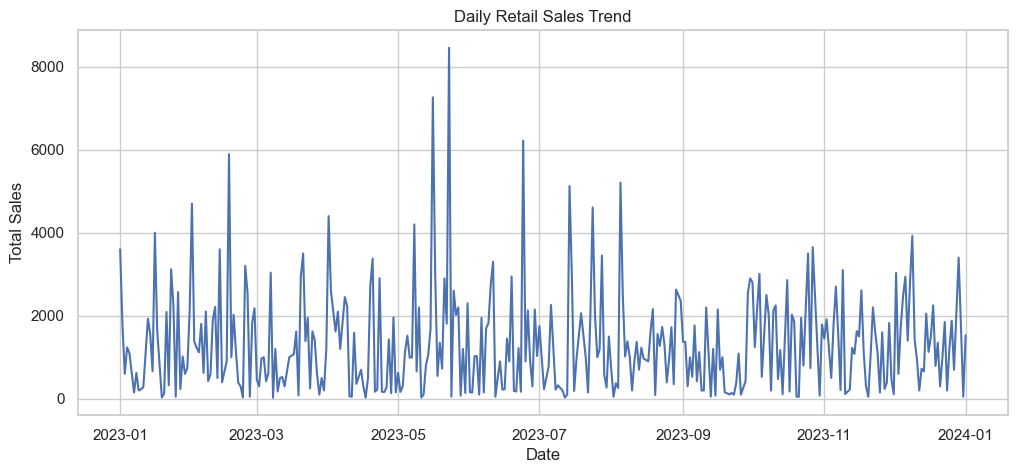

In [6]:
plt.figure(figsize=(12,5))
plt.plot(daily_sales)
plt.title("Daily Retail Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


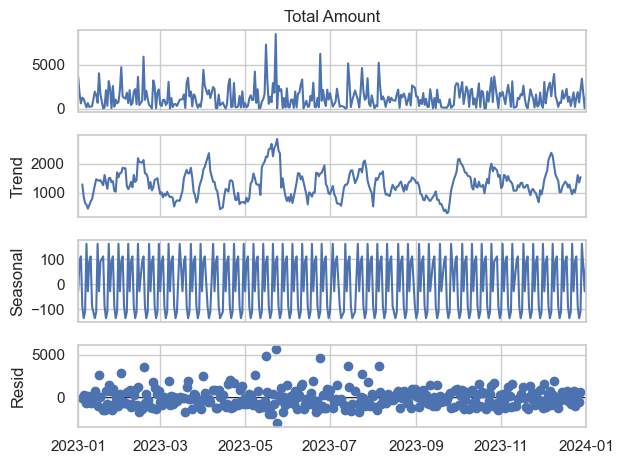

In [7]:
# ===============================
# 3. Decomposition
# ===============================

decomposition = seasonal_decompose(daily_sales, model="additive", period=7)

decomposition.plot()
plt.show()


<Figure size 1000x400 with 0 Axes>

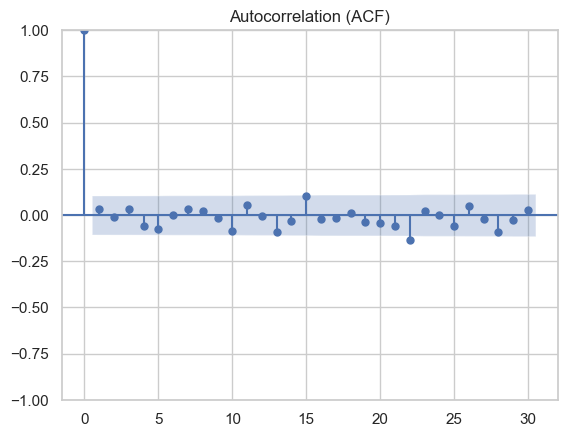

<Figure size 1000x400 with 0 Axes>

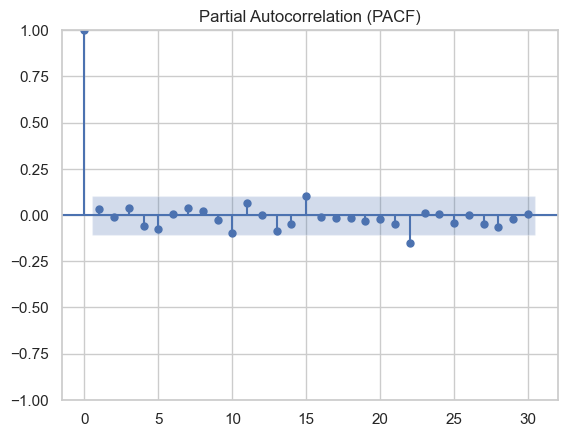

In [8]:
# ===============================
# 4. ACF & PACF
# ===============================

plt.figure(figsize=(10, 4))
plot_acf(daily_sales, lags=30)
plt.title("Autocorrelation (ACF)")
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(daily_sales, lags=30)
plt.title("Partial Autocorrelation (PACF)")
plt.show()

In [9]:

# ===============================
# 5. Stationarity Test (ADF)
# ===============================

result = adfuller(daily_sales)

print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] < 0.05:
    print("The series is stationary")
else:
    print("The series is NOT stationary")


ADF Statistic: -17.98763863453121
p-value: 2.7612078869907095e-30
The series is stationary


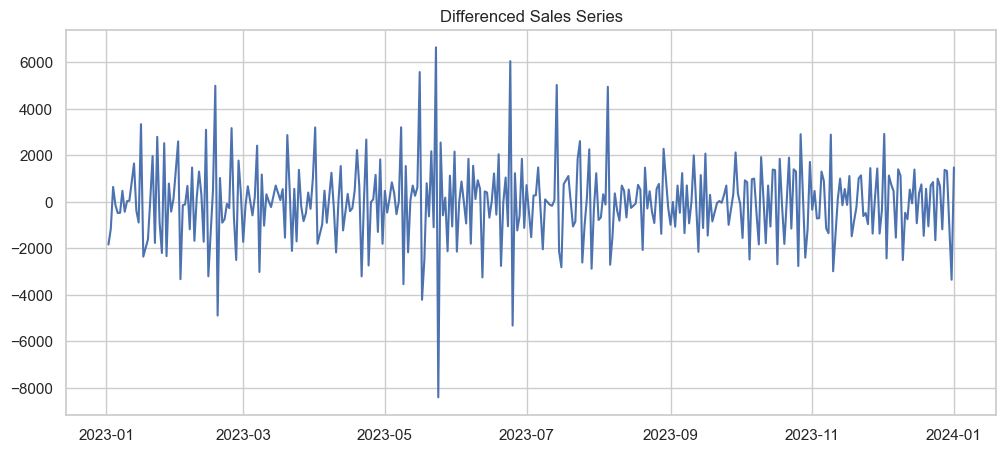

New p-value: 4.597942406450801e-14


In [10]:
diff_sales = daily_sales.diff().dropna()

plt.figure(figsize=(12,5))
plt.plot(diff_sales)
plt.title("Differenced Sales Series")
plt.show()

# Test again
result = adfuller(diff_sales)
print("New p-value:", result[1])


In [11]:
print("""
Key Observations:
- Trend shows overall sales movement over time.
- Seasonal patterns indicate weekly buying behavior.
- Residuals represent random noise.
- ADF test checks stationarity.
- Differencing stabilizes the time series.
""")



Key Observations:
- Trend shows overall sales movement over time.
- Seasonal patterns indicate weekly buying behavior.
- Residuals represent random noise.
- ADF test checks stationarity.
- Differencing stabilizes the time series.

